In [1]:
#Machine Learning Udacity Program

In [17]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import itertools
import math, time

start = datetime(2010, 1, 1)

end = datetime.today()

rates = web.DataReader(['DEXJPUS','DEXUSEU','DEXUSUK'], 'fred', start, end)
column_names = ['JPY','EUR','GBP']
rates.columns = column_names
final_rates = rates.dropna()
weekly_averages = [5, 20, 125]
for weekly_average, ccy in itertools.product(weekly_averages, column_names):
    final_rates['MA-{}-{}'.format(weekly_average,ccy)] = final_rates.loc[:,ccy].rolling(window=weekly_average).mean()

print(final_rates.head())

C:\Users\Justin\Miniconda3\envs\capstone\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


              JPY     EUR     GBP  MA-5-JPY  MA-5-EUR  MA-5-GBP  MA-20-JPY  \
DATE                                                                         
2010-01-04  92.55  1.4419  1.6109       NaN       NaN       NaN        NaN   
2010-01-05  91.48  1.4402  1.6009       NaN       NaN       NaN        NaN   
2010-01-06  92.53  1.4404  1.6016       NaN       NaN       NaN        NaN   
2010-01-07  93.31  1.4314  1.5912       NaN       NaN       NaN        NaN   
2010-01-08  92.70  1.4357  1.5993    92.514   1.43792   1.60078        NaN   

            MA-20-EUR  MA-20-GBP  MA-125-JPY  MA-125-EUR  MA-125-GBP  
DATE                                                                  
2010-01-04        NaN        NaN         NaN         NaN         NaN  
2010-01-05        NaN        NaN         NaN         NaN         NaN  
2010-01-06        NaN        NaN         NaN         NaN         NaN  
2010-01-07        NaN        NaN         NaN         NaN         NaN  
2010-01-08        NaN      

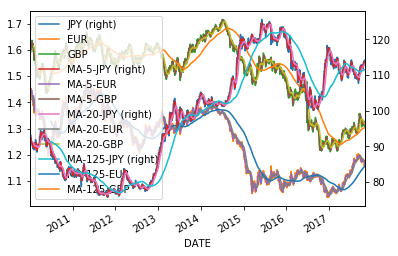

In [3]:
%matplotlib inline
final_rates.plot(secondary_y=['JPY','MA-5-JPY','MA-20-JPY','MA-125-JPY'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AD264A8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B7136A0>]], dtype=object)

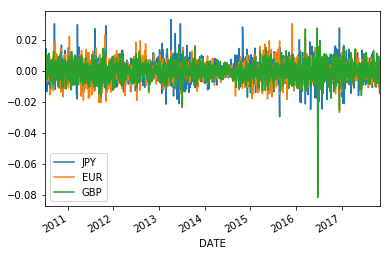

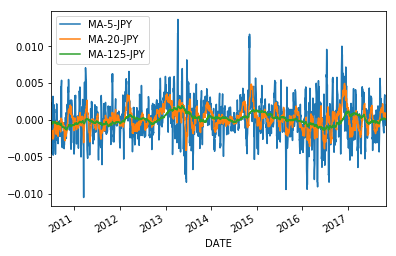

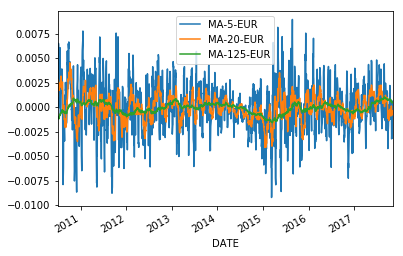

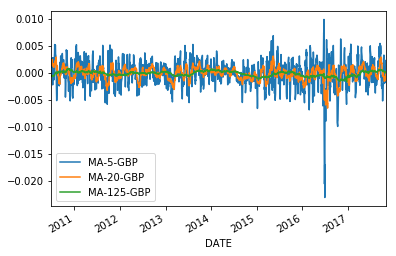

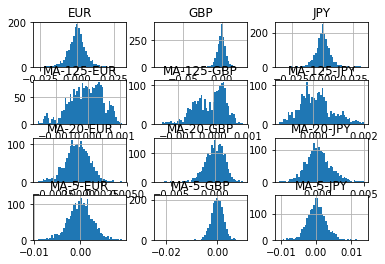

In [4]:
pct_changes = final_rates.pct_change().dropna()
log_returns = np.log(final_rates.pct_change().dropna() + 1)
log_returns.loc[:,column_names].plot()
names = [['MA-{}-{}'.format(tenor,column_name) for tenor in weekly_averages] for column_name in column_names]
for name in names:
    log_returns.loc[:,name].plot()
log_returns.hist(bins=50)

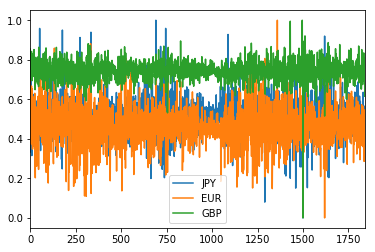

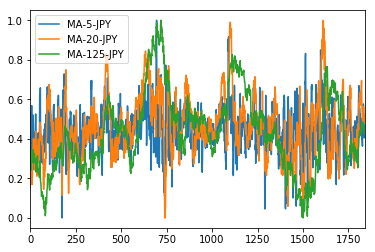

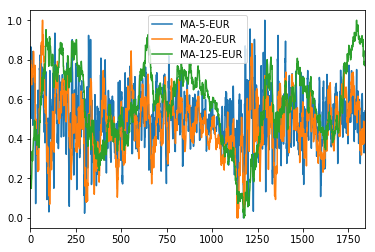

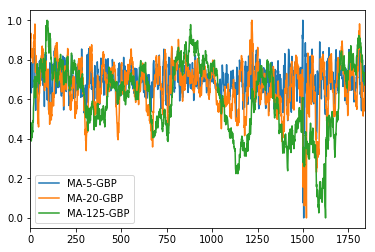

In [5]:
#normalize
scaler = MinMaxScaler()
scaler.fit(log_returns)
final = pd.DataFrame(scaler.transform(log_returns))
final.columns = log_returns.columns.values
final.loc[:,column_names].plot()
for name in names:
    final.loc[:,name].plot()
final = final.dropna()

In [6]:
#move to a matrix
def arrange_data(df, seq_len, test_pct):
    amount_of_features = len(sdf.columns)
    data = stock.as_matrix() #pd.DataFrame(stock)
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])

    result = np.array(result)
    row = round(test_pct * result.shape[0])
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [29]:
columns = {
    'jpy': [3,6,9,0],
    'eur': [4,7,10,1],
    'gbp': [5,8,11,2]}

jpy = final.iloc[:,columns['jpy']]
eur = final.iloc[:,columns['eur']]
gbp = final.iloc[:,columns['gbp']]

window = 5
features = len(jpy.columns)

jpy = arrange_data(jpy, window, 0.8) #tuple for jpy
eur = arrange_data(eur, window, 0.8) 
gbp = arrange_data(gbp, window, 0.8)

In [46]:
#set up the neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout, Activation

drop = 0.1
model = Sequential()
model.add(LSTM(128, input_shape=(window, features), return_sequences=True))
model.add(Dropout(drop))
model.add(LSTM(64, input_shape=(window, features), return_sequences=False))
model.add(Dropout(drop))
model.add(Dense(16,kernel_initializer='uniform',activation='relu'))        
model.add(Dense(1,kernel_initializer='uniform',activation='relu'))
model.compile(loss='mse',optimizer='rmsprop')

In [ ]:
model.fit(jpy[0],jpy[1], batch_size=512, epochs=500, verbose=0, validation_split=0.1)

In [48]:
trainScore = model.evaluate(jpy[0], jpy[1], verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(jpy[2], jpy[3], verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

IndexError: invalid index to scalar variable.

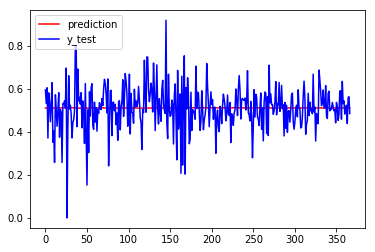

In [49]:
import matplotlib.pyplot as plt2

plt2.plot(p,color='red', label='prediction')
plt2.plot(jpy[3],color='blue', label='y_test')
plt2.legend(loc='upper left')
plt2.show()

In [40]:
print(jpy[0][1])

[[ 0.27815749  0.1974512   0.30309287  0.55640031]
 [ 0.2756834   0.17787211  0.27179705  0.48796083]
 [ 0.31767808  0.19624382  0.240986    0.44605237]
 [ 0.42916559  0.25967646  0.2906035   0.72444511]
 [ 0.53408362  0.29263008  0.31265822  0.51792937]]
